**Modeling (Task 1)**
---

*   Importing yolov5 module and using yolov5s lightweight model to train our data
*   Data is imported from roboflow and the is is the "chess_data_yolo.tgz"
*   Showing percision, recall and
*   Testing model at with a random picture of test

In [12]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15814 (delta 10), reused 25 (delta 2), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 11.59 MiB/s, done.
Resolving deltas: 100% (10819/10819), done.


In [13]:
%pip install -r yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [17]:
!tar xzf chess_data_yolo.tgz


Model is trained using yolov5 interface on pytorch. The used model is yolov5s deriviation of yolov5 model families which is a lightweight CNN model. Its configuration is loaded in the yolov5s.yaml file in the module.
*   Our data is the exctracted chess_data_yolo which has the specs on the data.yaml file. It's splited into ready test, train and valid folders along with their annotations in yolo format. Yolo annotation format is [cls_id, cx, cy, width, height]
*   Our images are augmented (416, 416) along with 3 channels of RGB
*   **NO INITIAL OR PRETRAINED WEIGHT IS USED IN THIS MODELING**
*   We used 50 epochs and 32 batch_size to ensure the data is fed continuesly and no overfitting has occured
*   Adam optimizer is used in the process which uses an adaptive learning rate (based on the magnitude of its gradients). Adam also incorporates the concept of momentum, which accelerates convergence and helps escape local minima.
*   We used BCELoss as default which is a Binary Cross Entroy loss class derived from pytorch's nn.BCEWithLogitsLoss

In [ ]:
from yolov5 import train
train.run(data='chess_data_yolo/data.yaml', imgsz=416, weights='',epochs=50 , cfg="yolov5s.yaml", batch_size=32, optimizer="Adam")

train: weights=, cfg=yolov5s.yaml, data=chess_data_yolo/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

Namespace(weights='', cfg='/content/yolov5/models/yolov5s.yaml', data='chess_data_yolo/data.yaml', hyp={'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket='', cache=None, image_weights=False, device='', multi_scale=False, single_cls=False, optimizer='Adam', sync_bn=False, workers=8, project='yolov5/runs/train', name='exp', exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank

**Validation Part**

Using data in valid folder of dataset we make test our generated model and show the results.

In [ ]:
from yolov5 import val
val.run(data="/content/chess_data_yolo/data.yaml", weights='yolov5/runs/train/exp/weights/best.pt', imgsz=416)

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /content/chess_data_yolo/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]
                   all         58        386      0.976      0.951      0.977      0.725
          black-bishop         58         22      0.997      0.955      0.959      0.652
            black-king         58         29      0.999          1      0.995      0.775
          black-knight         58         30      0.999          1      0.995      0.702
            black-pawn         58         77      0.997          1      0.995      0.755
           black-queen         58         11      0.935          1      0.995      0.797
           

((0.9762589068434347,
  0.9511570621349685,
  0.9770715409998818,
  0.7249978771750683,
  0.0,
  0.0,
  0.0),
 array([      0.725,      0.6516,     0.77471,     0.70194,     0.75514,     0.79689,     0.73092,     0.67077,     0.71882,     0.69661,     0.76522,     0.66834,     0.76902]),
 (0.08557171657167631, 13.808196988599054, 3.7081529354227))

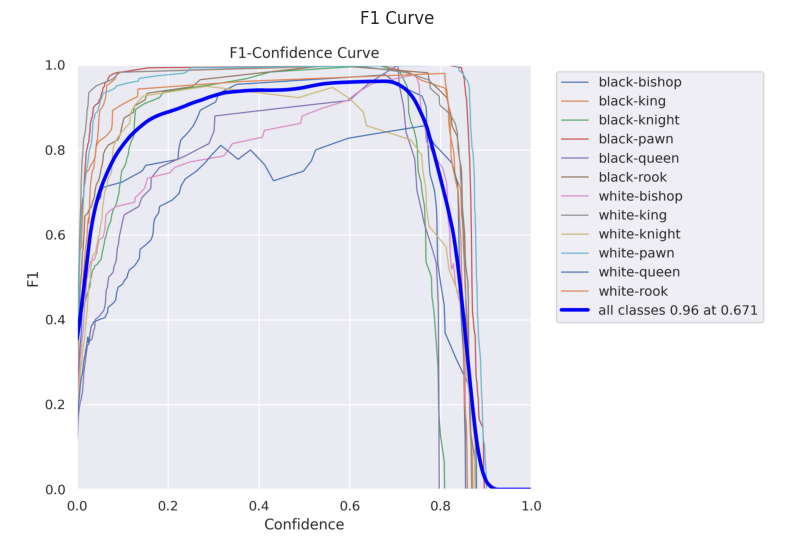

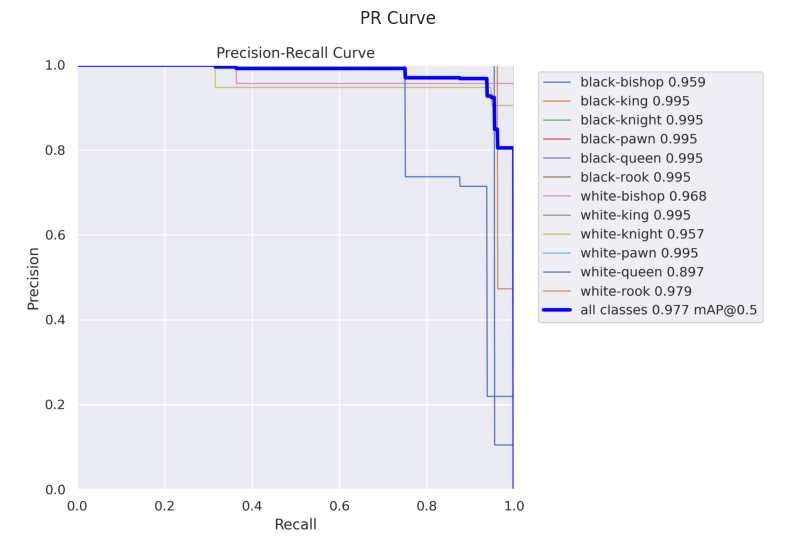

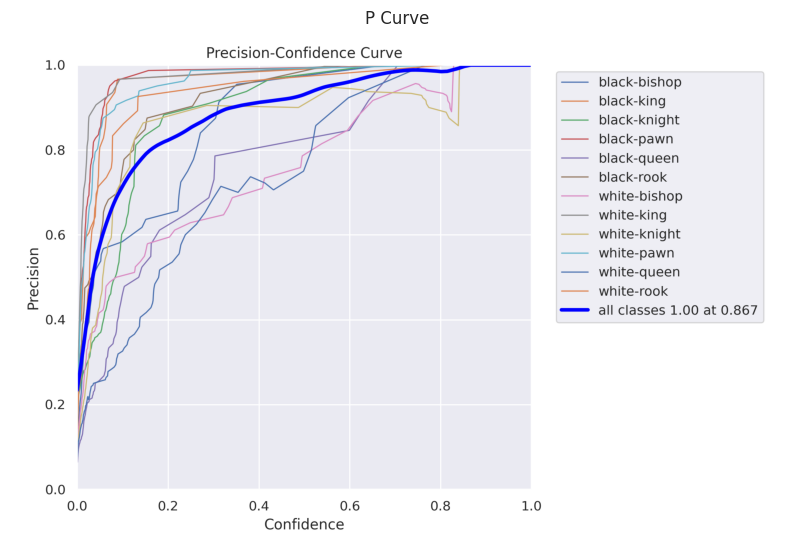

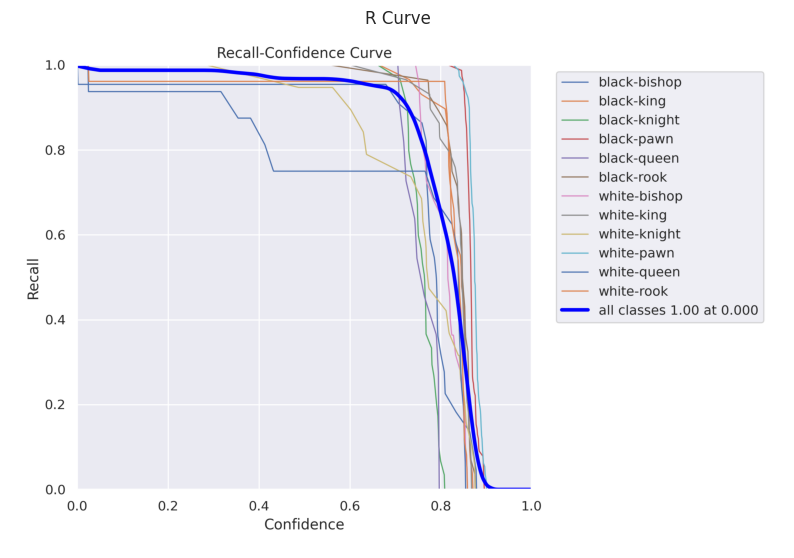

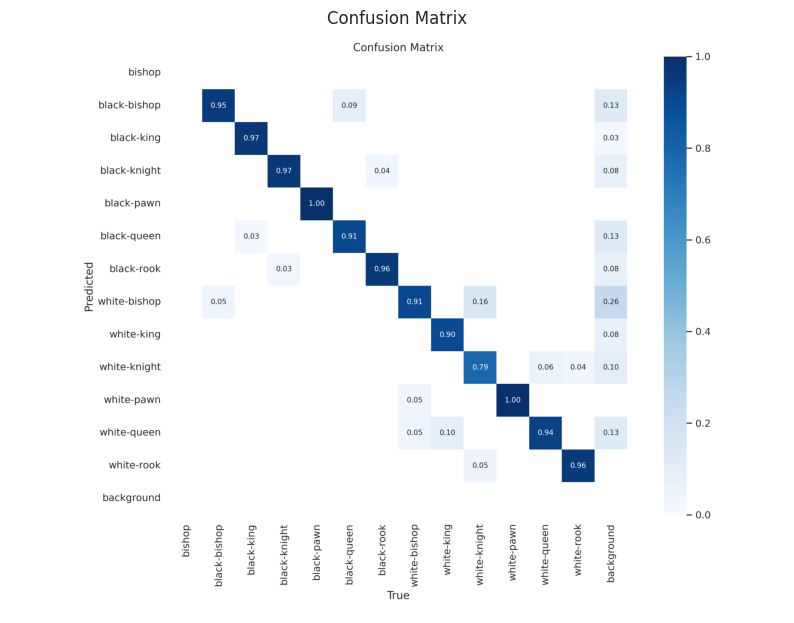

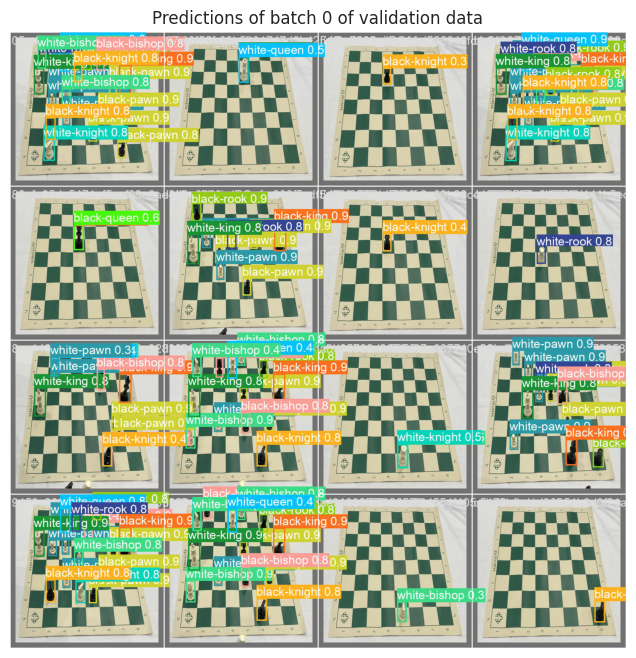

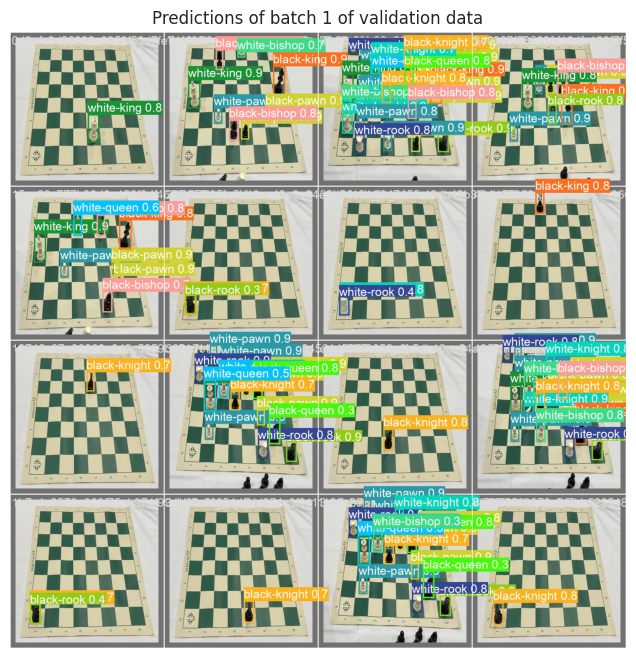

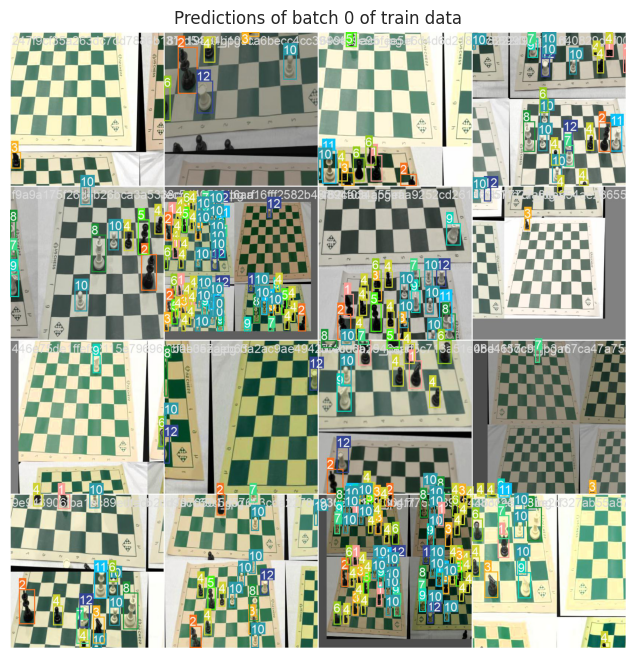

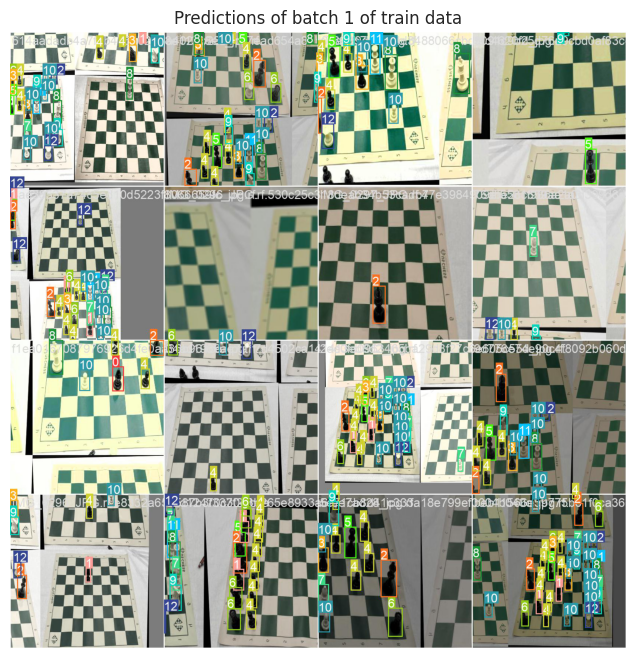

In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

directory = "/content/yolov5/runs/val/exp/"
train_dir = "/content/yolov5/runs/train/exp/"

f1_curve = plt.imread(os.path.join(directory, "F1_curve.png"))
pr_curve = plt.imread(os.path.join(directory, "PR_curve.png"))
p_curve = plt.imread(os.path.join(directory, "P_curve.png"))
r_curve = plt.imread(os.path.join(directory, "R_curve.png"))
confusion_matrix = plt.imread(os.path.join(directory, "confusion_matrix.png"))
val_batch0_pred = plt.imread(os.path.join(directory, "val_batch0_pred.jpg"))
val_batch1_pred = plt.imread(os.path.join(directory, "val_batch1_pred.jpg"))
train_batch0_pred = plt.imread(os.path.join(train_dir, "train_batch0.jpg"))
train_batch1_pred = plt.imread(os.path.join(train_dir, "train_batch1.jpg"))

# Display the image
fig = plt.figure(figsize=(10, 8))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.imshow(pr_curve)
plt.title("PR Curve")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.imshow(p_curve)
plt.title("P Curve")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.imshow(r_curve)
plt.title("R Curve")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.imshow(val_batch0_pred)
plt.title("Predictions of batch 0 of validation data")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.imshow(val_batch1_pred)
plt.title("Predictions of batch 1 of validation data")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.imshow(train_batch0_pred)
plt.title("Predictions of batch 0 of train data")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.imshow(train_batch1_pred)
plt.title("Predictions of batch 1 of train data")
plt.axis("off")
plt.show()

**Test the model at the moment**

The script below loads weights into the model and gives a torch.model class in which you can test any random picture to detect.
then using matplotlib we make labels for our predictions.

In [14]:
import torch

def load_model(weights_path):
  return torch.hub.load("yolov5", "custom", source = "local", path = weights_path, force_reload = False)

In [15]:
model = load_model("/content/best.pt")

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [16]:
def box_iou(boxes1, boxes2):
    """
    Calculate Intersection over Union (IoU) between two sets of bounding boxes.

    Args:
        boxes1 (Tensor): Tensor of shape (N, 4) containing N bounding boxes, where each box is defined by
                         (x1, y1, x2, y2) coordinates.
        boxes2 (Tensor): Tensor of shape (M, 4) containing M bounding boxes, where each box is defined by
                         (x1, y1, x2, y2) coordinates.

    Returns:
        iou (Tensor): Tensor of shape (N, M) containing the IoU between each pair of bounding boxes from boxes1
                      and boxes2.
    """
    N = boxes1.size(0)
    M = boxes2.size(0)

    lt = torch.max(boxes1[:, :2].unsqueeze(1), boxes2[:, :2].unsqueeze(0))
    rb = torch.min(boxes1[:, 2:].unsqueeze(1), boxes2[:, 2:].unsqueeze(0))

    wh = (rb - lt).clamp(min=0)
    inter = wh[:, :, 0] * wh[:, :, 1]

    area1 = (boxes1[:, 2] - boxes1[:, 0]) * (boxes1[:, 3] - boxes1[:, 1])
    area2 = (boxes2[:, 2] - boxes2[:, 0]) * (boxes2[:, 3] - boxes2[:, 1])

    iou = inter / (area1.unsqueeze(1) + area2 - inter)

    return iou


In [1]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import yaml

class YOLODataset(Dataset):
    def __init__(self, data_yaml_path, img_dir, label_dir, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform

        with open(data_yaml_path, 'r') as file:
            data = yaml.safe_load(file)  # Load data.yaml

        self.class_names = data['names']  # List of class names
        self.labels = ['bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']

        self.image_files = os.listdir(img_dir)  # Get list of image files in the directory

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        image_path = os.path.join(self.img_dir, image_file)
        label_path = os.path.join(self.label_dir, os.path.splitext(image_file)[0] + '.txt')

        image = Image.open(image_path).convert('RGB')
        boxes, labels = self.parse_label(label_path)

        if self.transform:
            image = self.transform(image)

        return image, {'boxes': boxes, 'labels': labels}

    def parse_label(self, label_path):
        with open(label_path, 'r') as file:
            lines = file.readlines()

        boxes = []
        labels = []

        for line in lines:
            line = line.strip().split(' ')
            label = int(line[0])
            x, y, w, h = map(float, line[1:])

            boxes.append([x, y, x + w, y + h])  # Convert to (x1, y1, x2, y2) format
            labels.append(label)

        return torch.tensor(boxes, dtype=torch.float32), torch.tensor(labels, dtype=torch.int64)

# Example usage
data_yaml_path = '/content/chess_data_yolo/data.yaml'
img_dir = '/content/chess_data_yolo/valid/images'
label_dir = '/content/chess_data_yolo/valid/labels'
transform = transforms.ToTensor()

In [2]:
import torch

# Set the model to evaluation mode

model.eval()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define your validation dataset and data loader
validation_dataset = YOLODataset(data_yaml_path, img_dir, label_dir, transform=transform)
validation_dataloader = torch.utils.data.DataLoader(validation_dataset, batch_size=1, shuffle=False)

total_correct_class_predictions = 0
total_correct_detections = 0
total_predicted_bounding_boxes = 0

with torch.no_grad():
    for images, targets in validation_dataloader:
        images = images.to(device)
        targets = {k: v.to(device) for k,v in targets.items()}

        # Forward pass through the model
        outputs = model(images)

        predicted_boxes = outputs[0]['boxes']
        predicted_labels = outputs[0]['labels']
        predicted_scores = outputs[0]['scores']

        # Calculate classification precision
        correct_class_predictions = (predicted_labels == targets['labels']).sum().item()
        total_correct_class_predictions += correct_class_predictions
        total_predicted_bounding_boxes += len(predicted_labels)

        # Calculate detection precision
        for i in range(len(targets['boxes'])):
            target_boxes = targets['boxes'][i].unsqueeze(0)
            target_labels = targets['labels'][i].unsqueeze(0)

            for j in range(len(predicted_boxes)):
                iou = box_iou(target_boxes, predicted_boxes[j].unsqueeze(0))
                max_iou, _ = iou.max(0)

                if max_iou.item() > 0.5 and predicted_labels[j] == target_labels:
                    total_correct_detections += 1
                    break

# Calculate precision
classification_precision = total_correct_class_predictions / total_predicted_bounding_boxes
detection_precision = total_correct_detections / total_predicted_bounding_boxes

print("Classification Precision: {:.4f}".format(classification_precision))
print("Detection Precision: {:.4f}".format(detection_precision))


NameError: ignored

In [7]:
def denormalize_piece_info(piece_info, width, height):
    piece_info[:, (0, 2)] *= width
    piece_info[:, (1, 3)] *= height
    return piece_info

In [9]:
import cv2
import random
from glob import glob

# images = glob("/content/chess_data_yolo/test/images/*jpg")

img = cv2.imread("/content/1280px-Chess_board_opening_staunton.jpg", cv2.IMREAD_COLOR)
prediction = model(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
model_output = prediction.xyxyn[0].cpu().numpy()
model_output_denormalized = denormalize_piece_info(model_output, img.shape[1], img.shape[0])

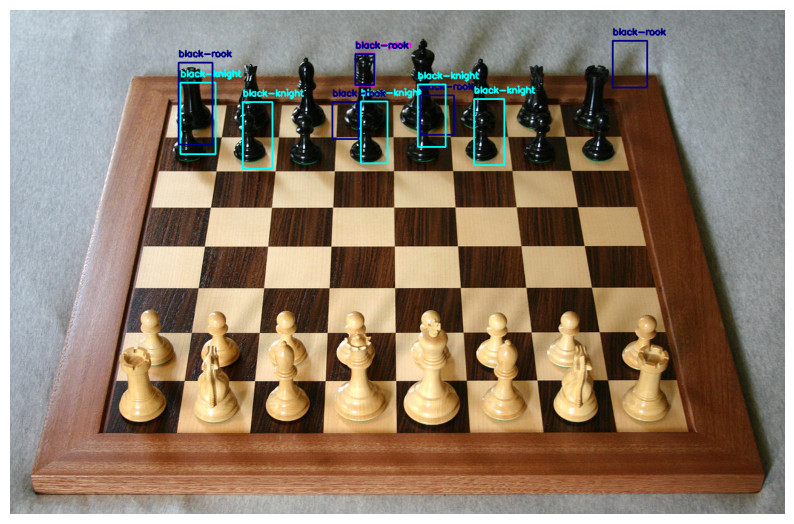

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define the colors for different classes (modify as per your requirements)
class_colors = {
    0: (255, 0, 0),   # Class 0: Red
    1: (0, 255, 0),   # Class 1: Green
    2: (0, 0, 255),   # Class 2: Blue
    3: (255, 255, 0),  # Class 3: Yellow
    4: (255, 0, 255),  # Class 4: Magenta
    5: (0, 255, 255),  # Class 5: Cyan
    6: (128, 0, 0),    # Class 6: Maroon
    7: (0, 128, 0),    # Class 7: Green (dark)
    8: (0, 0, 128),    # Class 8: Navy
    9: (128, 128, 0),  # Class 9: Olive
    10: (128, 0, 128),  # Class 10: Purple
    11: (0, 128, 128),  # Class 11: Teal
    12: (128, 128, 128),  # Class 12: Gray
    # Add more colors for additional classes if necessary
}

label_names = ['bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']

# Iterate over the array and draw bounding boxes on the image
for box in model_output_denormalized:
    xmin, ymin, xmax, ymax, confidence, class_id = box

    # Convert the coordinates from float to integer
    xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)

    # Get the color for the current class
    color = class_colors[class_id]

    # Draw the bounding box rectangle on the image
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color, 2)

    # Display class label and confidence score
    label = f"{label_names[int(class_id)]}"
    cv2.putText(img, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

**Corner Dectetion(Task 2)**
---

*   A Dataset of points and corners have been gathered using opencv
*   The dataset is in corners/ folder. It consists pics/ and coordinates/ respectively
*   Coordinates are according to pages but with different postfix as names
*   Cooridnates are like ymin, ymax, xmax, xmin
*   A CNN model named CornerDetectionCNN is created to compute the four corners of image
*   A custom IoULoss is used as loss function

In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!tar xzf corners.tgz

tar: corners/coordinates: implausibly old time stamp 1969-12-31 20:30:00
tar: corners/pics: implausibly old time stamp 1969-12-31 20:30:00


In [3]:
import torch
import numpy as np
import os

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_folder, coordinates_folder , transform=None):
        self.image_folder = image_folder
        self.coordinates_folder = coordinates_folder
        self.transform = transform
        self.images, self.coordinates = self.load_coordinates()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_name = self.images[idx] + ".jpg"
        image_path = os.path.join(self.image_folder, image_name)
        image = cv2.imread(image_path,0)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        coordinates_for_image = self.coordinates[self.images[idx]]

        image = TF.to_tensor(image)

        return image, coordinates_for_image

    def load_coordinates(self):
        coordinates = dict()
        images = []
        for image_file in os.listdir(self.image_folder):


            image_name = os.path.splitext(image_file)[0]

            images.append(image_name)

            txt_path = os.path.join(self.coordinates_folder, image_name + ".txt")
            points = []

            with open(txt_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    x,y = line.replace("(","").replace(")","").strip().split(',')
                    # points.append([float(x)/416 , float(y)/416])
                    points.append([float(x) , float(y)])


            coordinates[image_name] = np.array(points).astype('float32')

        return images,coordinates

dataset = CustomDataset("/content/corners/pics", "/content/corners/coordinates")

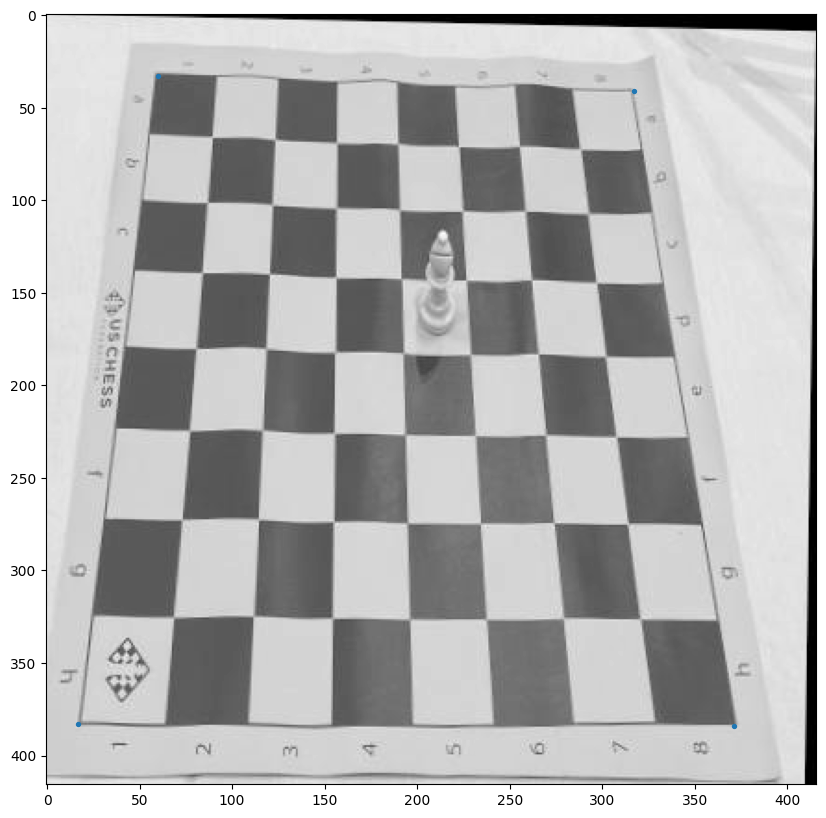

In [4]:
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import cv2

image, landmarks = dataset[0]
landmarks = (landmarks)
plt.figure(figsize=(10, 10))
plt.imshow(image.numpy().squeeze(), cmap='gray');
plt.scatter(landmarks[:,0], landmarks[:,1], s=8);

In [5]:
# split the dataset into validation and test sets
len_valid_set = int(0.2*len(dataset))
len_train_set = len(dataset) - len_valid_set

print("The length of Train set is {}".format(len_train_set))
print("The length of Valid set is {}".format(len_valid_set))

train_dataset , valid_dataset,  = torch.utils.data.random_split(dataset , [len_train_set, len_valid_set])

# shuffle and batch the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=8, shuffle=True, num_workers=2)

The length of Train set is 78
The length of Valid set is 19


In [6]:
import torch
import torch.nn as nn

class CornerDetectionCNN(nn.Module):
    def __init__(self):
        super(CornerDetectionCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * 208 * 208, 8)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)

        return x

In [7]:
# Define the IoU loss function
class IoULoss(nn.Module):
    def __init__(self):
        super(IoULoss, self).__init__()

    def forward(self, pred, target):
        intersection = torch.min(pred, target).sum(dim=1)
        union = torch.max(pred, target).sum(dim=1)
        iou = intersection / union
        loss = 1.0 - iou.mean()

        return loss

In [8]:
import sys

def print_overwrite(step, total_step, loss, operation):
    sys.stdout.write('\r')
    if operation == 'train':
        sys.stdout.write("Train Steps: %d/%d  Loss: %.4f " % (step, total_step, loss))
    else:
        sys.stdout.write("Valid Steps: %d/%d  Loss: %.4f " % (step, total_step, loss))

    sys.stdout.flush()

In [ ]:
del images
del landmarks
import gc
torch.cuda.empty_cache()
gc.collect()

32588

In [11]:
import torch.optim as optim
import time


torch.autograd.set_detect_anomaly(True)
network = CornerDetectionCNN()
network.cuda()

criterion = IoULoss()
optimizer = optim.Adam(network.parameters(), lr=0.001)

loss_min = np.inf
num_epochs = 30

start_time = time.time()
for epoch in range(1,num_epochs+1):

    tp = 0
    fp = 0
    threshold_distance = 10


    loss_train = 0
    loss_valid = 0
    running_loss = 0

    network.train()
    for step in range(1,len(train_loader)+1):

        images, landmarks = next(iter(train_loader))

        images = images.cuda()
        landmarks = landmarks.view(landmarks.size(0),-1).cuda()

        print(images.shape)

        predictions = network(images)

        # clear all the gradients before calculating them
        optimizer.zero_grad()

        # find the loss for the current step
        loss_train_step = criterion(predictions, landmarks)

        # calculate the gradients
        loss_train_step.backward()

        # update the parameters
        optimizer.step()

        loss_train += loss_train_step.item()
        running_loss = loss_train/step

        print_overwrite(step, len(train_loader), running_loss, 'train')

    network.eval()
    with torch.no_grad():

        for step in range(1,len(valid_loader)+1):

            images, landmarks = next(iter(valid_loader))

            images = images.cuda()
            landmarks = landmarks.view(landmarks.size(0),-1).cuda()

            predictions = network(images)

            # Calculate precision
            for i in range(predictions.shape[0]):
                for j in range(predictions.shape[1]):
                    pred_corner = predictions[i, j].cpu().numpy()
                    gt_corner = landmarks[i, j].cpu().numpy()

                    distance = np.linalg.norm(pred_corner - gt_corner)
                    if distance <= threshold_distance:
                        tp += 1
                    else:
                        fp += 1


            # find the loss for the current step
            loss_valid_step = criterion(predictions, landmarks)

            loss_valid += loss_valid_step.item()
            running_loss = loss_valid/step

            print_overwrite(step, len(valid_loader), running_loss, 'valid')

    loss_train /= len(train_loader)
    loss_valid /= len(valid_loader)

    precision = tp / (tp + fp)
    print("\nPrecision: {:.4f}".format(precision))

    print('\n--------------------------------------------------')
    print('Epoch: {}  Train Loss: {:.4f}  Valid Loss: {:.4f}'.format(epoch, loss_train, loss_valid))
    print('--------------------------------------------------')

    if loss_valid < loss_min:
        loss_min = loss_valid
        torch.save(network.state_dict(), '/content/corner_detector.pth')
        print("\nMinimum Validation Loss of {:.4f} at epoch {}/{}".format(loss_min, epoch, num_epochs))
        print('Model Saved\n')

print('Training Complete')
print("Total Elapsed Time : {} s".format(time.time()-start_time))

torch.Size([32, 1, 416, 416])
Train Steps: 1/3  Loss: 0.9999 torch.Size([32, 1, 416, 416])
Train Steps: 2/3  Loss: 0.8818 torch.Size([32, 1, 416, 416])
Valid Steps: 3/3  Loss: 0.4244 
Precision: 0.0000

--------------------------------------------------
Epoch: 1  Train Loss: 0.7915  Valid Loss: 0.4244
--------------------------------------------------

Minimum Validation Loss of 0.4244 at epoch 1/30
Model Saved

torch.Size([32, 1, 416, 416])
Train Steps: 1/3  Loss: 0.4367 torch.Size([32, 1, 416, 416])
Train Steps: 2/3  Loss: 0.3575 torch.Size([32, 1, 416, 416])
Valid Steps: 3/3  Loss: 0.2664 
Precision: 0.2083

--------------------------------------------------
Epoch: 2  Train Loss: 0.3406  Valid Loss: 0.2664
--------------------------------------------------

Minimum Validation Loss of 0.2664 at epoch 2/30
Model Saved

torch.Size([32, 1, 416, 416])
Train Steps: 1/3  Loss: 0.2849 torch.Size([32, 1, 416, 416])
Train Steps: 2/3  Loss: 0.2832 torch.Size([32, 1, 416, 416])
Valid Steps: 3/3

torch.Size([8, 1, 416, 416])
Total number of test images: 19
Elapsed Time : 0.6877429485321045


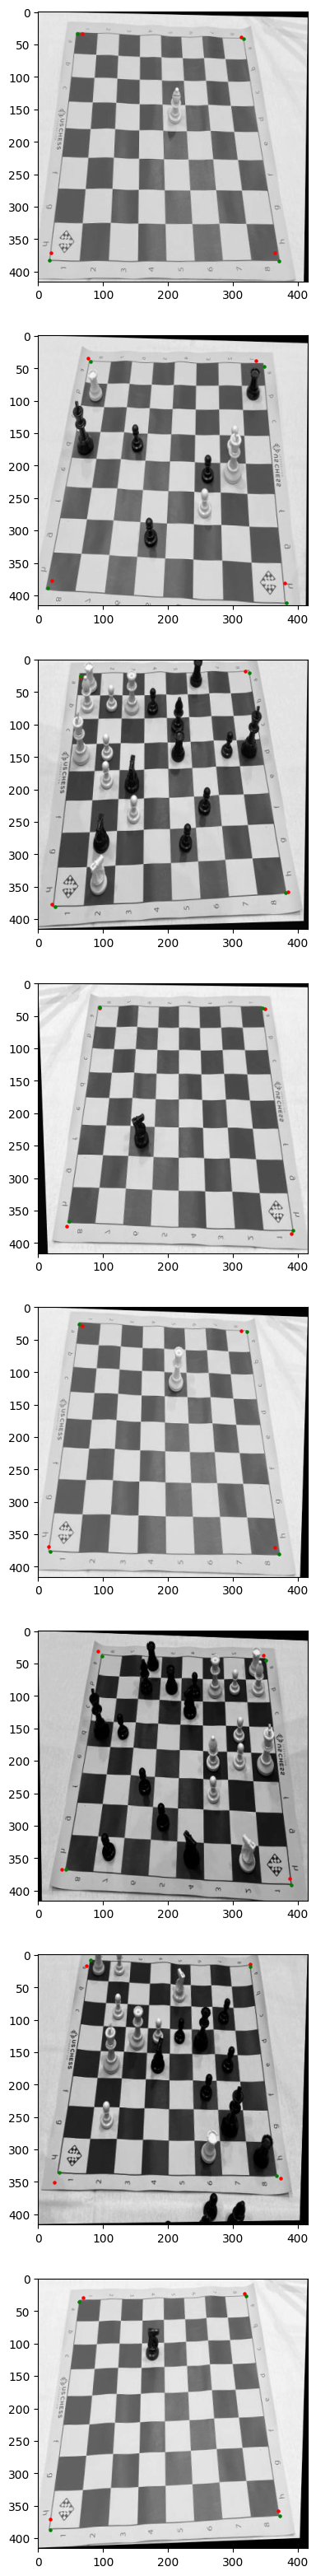

In [ ]:
start_time = time.time()

with torch.no_grad():

    best_network = CornerDetectionCNN()
    best_network.cuda()
    best_network.load_state_dict(torch.load('/content/corner_detector.pth'))
    best_network.eval()

    images, landmarks = next(iter(valid_loader))

    images = images.cuda()
    landmarks = (landmarks)

    predictions = (best_network(images).cpu())
    predictions = predictions.view(-1,4,2)

    plt.figure(figsize=(10,40))

    for img_num in range(8):
        plt.subplot(8,1,img_num+1)
        plt.imshow(images[img_num].cpu().numpy().transpose(1,2,0).squeeze(), cmap='gray')
        plt.scatter(predictions[img_num,:,0], predictions[img_num,:,1], c = 'r', s = 5)
        plt.scatter(landmarks[img_num,:,0], landmarks[img_num,:,1], c = 'g', s = 5)

print('Total number of test images: {}'.format(len(valid_dataset)))

end_time = time.time()
print("Elapsed Time : {}".format(end_time - start_time))

In [11]:
def corner_detector(img):
    best_network = CornerDetectionCNN()
    best_network.load_state_dict(torch.load('/content/corner_detector.pth'))
    pred = best_network(img)
    return pred

**Create Chessboard (Task 3)**

---



In [ ]:
!tar xzf chess_pics.tgz

tar: chess_pics/white: implausibly old time stamp 1969-12-31 20:30:00
tar: chess_pics/black: implausibly old time stamp 1969-12-31 20:30:00


In [ ]:
def transform_points(corners,boxes):
    # Load the image
    virtual_chess_board = cv2.imread('chess_pics/blank-chess-board-400x400.png')
    board_width,board_height,_ = virtual_chess_board.shape
    # Define the corners of the standard view (four corners of the chessboard)
    standard_corners = np.array([[0, 0], [board_width, 0], [board_width, board_height], [0, board_height]], dtype=np.float32)

    # Define the obtained corners in the image
    obtained_corners = np.array([corners[0], corners[1], corners[2], corners[3]], dtype=np.float32)

    # Find the perspective transformation matrix
    H = cv2.getPerspectiveTransform(obtained_corners, standard_corners)

    # transform boxes to standard view
    transformed_boxes = []
    for box in boxes:
        transformed_boxes.append(cv2.perspectiveTransform(np.reshape(np.array(box,dtype=np.float32),(4,1,2)), H))
    return np.reshape(np.array(transformed_boxes).astype(np.int32),(len(boxes),4,2))

In [ ]:
import cv2
import matplotlib.pyplot as plt

def piece_location(x,y):
    return (x*50+50//2,y*50+50//2)

# Define the coordinates of chess piece locations on the chessboard
piece_locations = dict()

# Load the chess piece images
piece_images = {
    'black-king': cv2.imread('chess_pics/black/king.png', cv2.IMREAD_UNCHANGED),
    'black-queen': cv2.imread('chess_pics/black/queen.png', cv2.IMREAD_UNCHANGED),
    'black-rook': cv2.imread('chess_pics/black/rook.png', cv2.IMREAD_UNCHANGED),
    'black-bishop': cv2.imread('chess_pics/black/bishop.png', cv2.IMREAD_UNCHANGED),
    'black-knight': cv2.imread('chess_pics/black/horse.png', cv2.IMREAD_UNCHANGED),
    'black-pawn': cv2.imread('chess_pics/black/pawn.png', cv2.IMREAD_UNCHANGED),
    'white-pawn': cv2.imread('chess_pics/white/king.png', cv2.IMREAD_UNCHANGED),
    'white-queen': cv2.imread('chess_pics/white/queen.png', cv2.IMREAD_UNCHANGED),
    'white-rook': cv2.imread('chess_pics/white/rook.png', cv2.IMREAD_UNCHANGED),
    'white-bishop': cv2.imread('chess_pics/white/bishop.png', cv2.IMREAD_UNCHANGED),
    'white-knight': cv2.imread('chess_pics/white/horse.png', cv2.IMREAD_UNCHANGED),
    'white-pawn': cv2.imread('chess_pics/white/pawn.png', cv2.IMREAD_UNCHANGED),
}

def box_to_point(box):
    top_left, top_right, bottom_right, bottom_left = box
    x = (bottom_left[0] + bottom_right[0])//2
    y = (bottom_left[1] + bottom_right[1])//2
    return (x//50,y//50)

def show_virtual_chessboard(corners,boxes,pieces):
    # Load the chessboard image
    chessboard = cv2.imread('chess_pics/blank-chess-board-400x400.png')
    board_width,board_hight,_ = chessboard.shape
    piece_width,piece_hight = board_hight//8,board_width//8

    boxes = transform_points(corners,boxes)

    for box,piece_name in zip(boxes,pieces):
        x,y = box_to_point(box)
        piece_locations[piece_name] = (x,y)

# Iterate over the chess piece locations
    for piece, location in piece_locations.items():
        # Get the corresponding chess piece image
        piece_image = cv2.resize(piece_images[piece], (50, 50))
        # Get the dimensions of the chess piece image
        height, width = 50,50

        # Calculate the coordinates for placing the chess piece on the chessboard
        x, y = piece_location(location[0],location[1])

        # Extract the alpha channel of the chess piece image
        alpha_channel = piece_image[:, :, 3] / 255.0

        # Paste the chess piece image on the chessboard, considering the alpha channel
        for c in range(3):
            chessboard[y-height//2:y + height//2, x-width//2:x + width//2, c] = (
                alpha_channel * piece_image[:, :, c] +
                (1 - alpha_channel) * chessboard[y-height//2:y + height//2, x-width//2:x + width//2, c]
            )

    # Display the final image with chess pieces on the chessboard
    image_rgb = cv2.cvtColor(chessboard, cv2.COLOR_BGR2RGB)


    # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image_rgb)

    # Remove the axis labels
    ax.axis('off')

    # Show the plot
    plt.show()


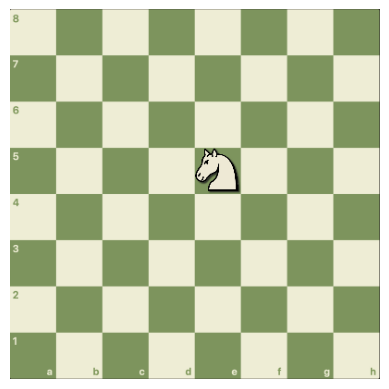

In [ ]:
import numpy as np
show_virtual_chessboard([(60, 33), (317, 41), (371, 364), (17, 383)],
                        [np.array([[211,114],[223,116],[226,173],[197,172]])],
                        ["white-knight"])

In [19]:
def transform_into_pairs(coords_list):
    pairs_list = []
    for coords in coords_list:
        xmin, ymin, xmax, ymax = coords[0], coords[1], coords[2], coords[3]
        top_left = (xmin, ymin)
        top_right = (xmax, ymin)
        bottom_left = (xmin, ymax)
        bottom_right = (xmax, ymax)
        pairs_list.append((top_left, top_right, bottom_left, bottom_right))
    return pairs_list


In [17]:
import cv2
import random
from glob import glob

images = glob("/content/chess_data_yolo/valid/images/*jpg")
tensor_imgs = []
imgs = []
# image = "/content/1280px-Chess_board_opening_staunton.jpg"

for _ in range(8):
  img = cv2.imread(random.choice(images), cv2.IMREAD_COLOR)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  tensor_img = TF.to_tensor((img_gray))
  imgs.append(img)
  tensor_imgs.append(tensor_img)

tensor_imgs = torch.stack(tensor_imgs)

corners = corner_detector(tensor_imgs)

In [21]:
import numpy as np
boxes = []
labels = []
for img in imgs:
    prediction = model(img)
    model_output = prediction.xyxyn[0].cpu().numpy()
    model_output_denormalized = denormalize_piece_info(model_output, img.shape[1], img.shape[0])
    boxes.append([np.array(list(map(int, out[0:4]))) for out in model_output_denormalized])
    boxes = transform_into_pairs(boxes)
    labels.append([int(out[5]) for out in model_output_denormalized])

IndexError: ignored

In [ ]:
labels = [[label_names[i] for i in sublist] for sublist in labels]

In [ ]:
result = []
for tensor in corners:
    # Reshape each tensor into pairs of coordinates
    tensor = tensor.reshape(-1, 2)

    # Convert the tensor to a list of tuples with integer values
    tensor = [(int(x), int(y)) for x, y in tensor]

    result.append(tensor)

corners = result

In [ ]:
print(corners[0])
print(boxes[0])
print(labels[0])

[(68, 34), (315, 34), (385, 368), (31, 377)]
[array([166,   0, 194,  63])]
['black-king']


In [ ]:
show_virtual_chessboard(corners[0], boxes[0], labels[0])